<a href="https://colab.research.google.com/github/HardikxLabeitazer/DataScience-Practice-/blob/master/MLBasics5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hvplot

     |████████████████████████████████| 3.1 MB 7.0 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/BasicsPrac/Real estate.csv')
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [4]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
df.shape

(414, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df.corr()

No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores             0.049593   
X5 latitude                                 0.054420   
X6 longitude                               -0.048520   
Y house price of unit area                 -0.210567   

                                        X3 distance to the nearest MRT station  \
No                                                                   -0.013573   
X1 transaction date                                                   0.060880   
X2 house age                                                          0.025622   
X3 distance to the nearest MRT station                                1.000000   
X4 number of convenience stores                                      -0.602519   
X5 latitude                                                          -0.591067   
X6 longitude                                                         -0.806317   
Y house price of unit area                                           -0.673613   

                                        X4 number of convenience stores  \
No                                                            -0.012699   
X1 transaction date                                            0.009635   
X2 house age                                                   0.049593   
X3 distance to the nearest MRT station                        -0.602519   
X4 number of convenience stores                                1.000000   
X5 latitude                                                    0.444143   
X6 longitude                                                   0.449099   
Y house price of unit area                                     0.571005   

                                        X5 latitude  X6 longitude  \
No                                        -0.010110     -0.011059   
X1 transaction date                        0.035058     -0.041082   
X2 house age                               0.054420     -0.048520   
X3 distance to the nearest MRT station    -0.591067     -0.806317   
X4 number of convenience stores            0.444143      0.449099   
X5 latitude                                1.000000      0.412924   
X6 longitude                               0.412924      1.000000   
Y house price of unit area                 0.546307      0.523287   

                                        Y house price of unit area  
No                                                       -0.028587  
X1 transaction date                                       0.087491  
X2 house age                                             -0.210567  
X3 distance to the nearest MRT station                   -0.673613  
X4 number of convenience stores                           0.571005  
X5 latitude                                               0.546307  
X6 longitude                                              0.523287  
Y house price of unit area                                1.000000

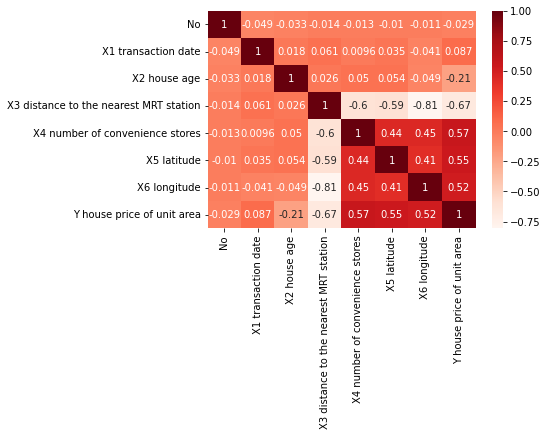

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='Reds')

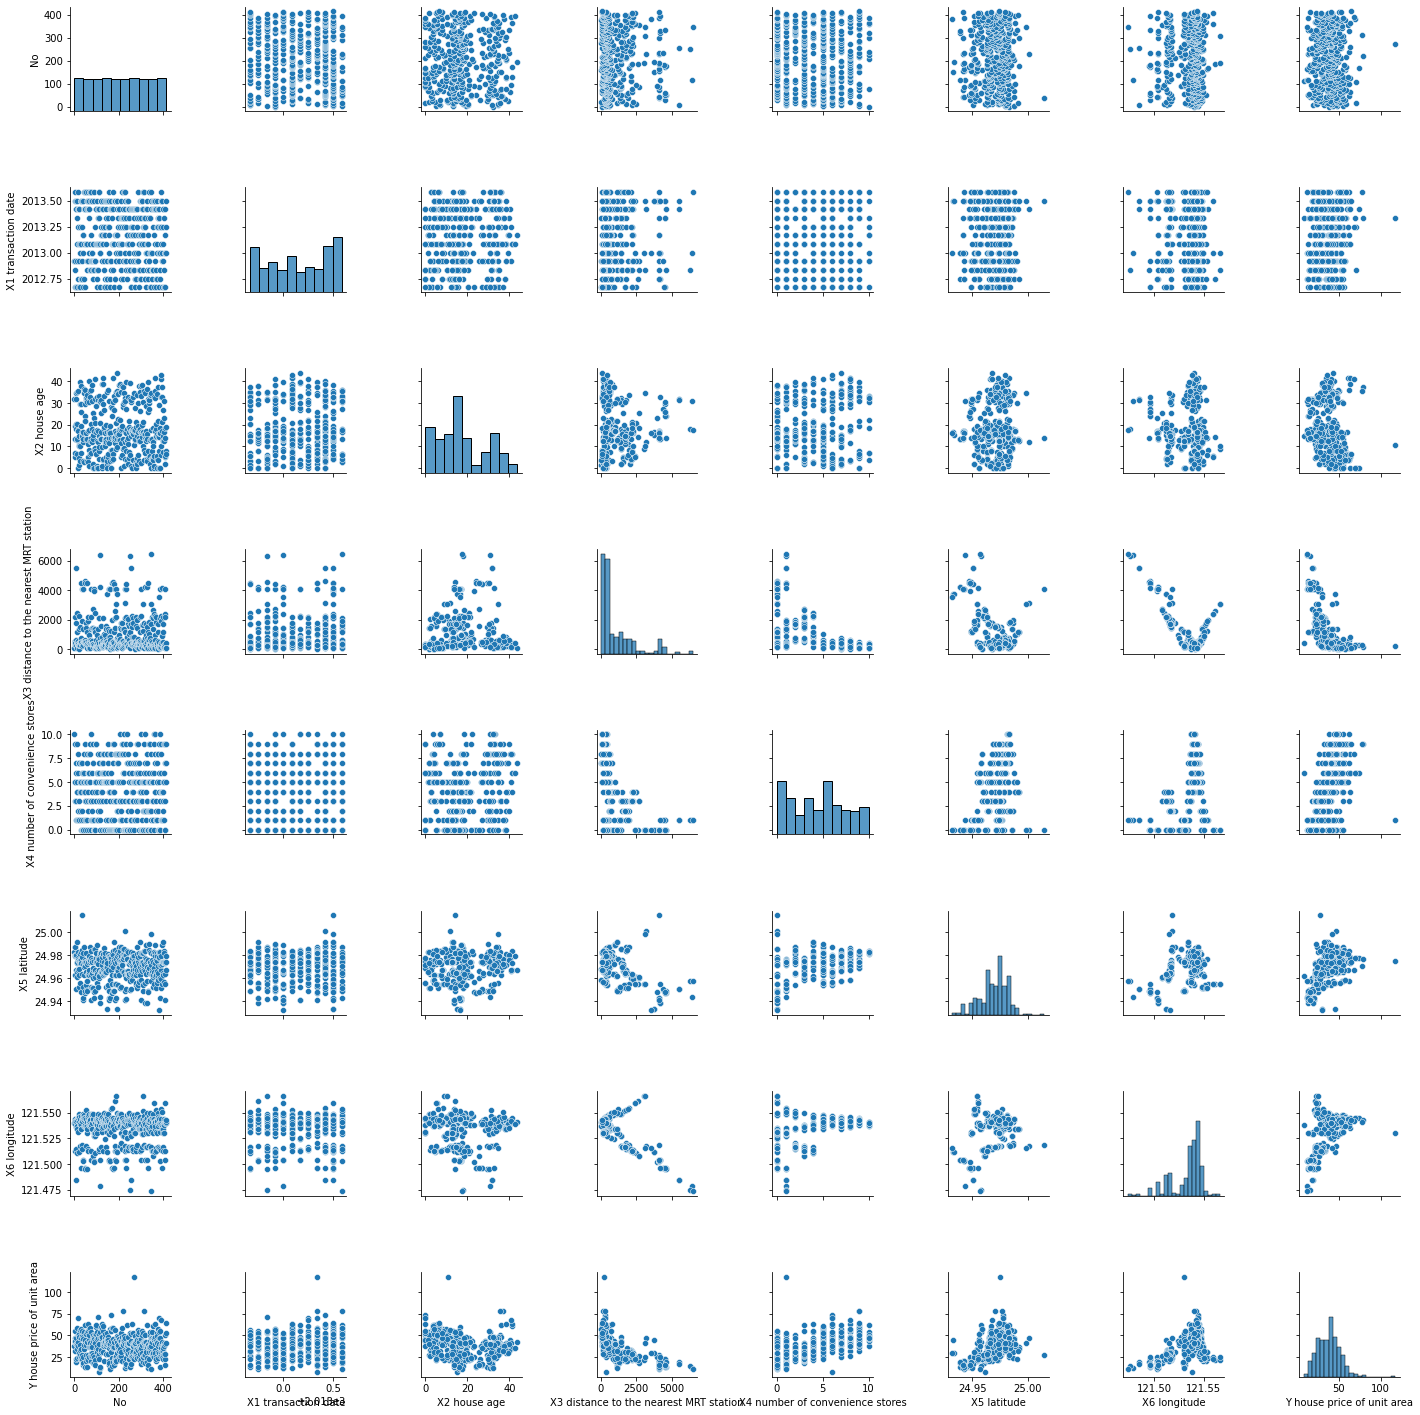

In [9]:
sns.pairplot(df)

In [11]:
X=df.drop('Y house price of unit area',axis=1)
y=df['X4 number of convenience stores']

In [12]:
X.shape,y.shape

((414, 7), (414,))

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
X_train.shape,X_test.shape

((289, 7), (125, 7))

In [25]:
model =LinearRegression().fit(X_train,y_train)

In [26]:
model.coef_

array([-1.49344835e-17, -9.09342046e-15, -1.36338423e-16,  1.73472348e-18,
        1.00000000e+00,  1.28927721e-14,  1.08238203e-14])

In [27]:
pd.DataFrame(model.coef_,X.columns,columns=['Coedicients'])

Coedicients
No                                     -1.493448e-17
X1 transaction date                    -9.093420e-15
X2 house age                           -1.363384e-16
X3 distance to the nearest MRT station  1.734723e-18
X4 number of convenience stores         1.000000e+00
X5 latitude                             1.289277e-14
X6 longitude                            1.082382e-14

In [28]:
y_pred = model.predict(X_test)

In [29]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [30]:
MAE,MSE,RMSE

(4.231748536250847e-15, 2.718688400256278e-29, 5.214104333685967e-15)

In [31]:
df['X4 number of convenience stores'].mean()

4.094202898550725

In [32]:
test_residual = y_test-y_pred

In [35]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

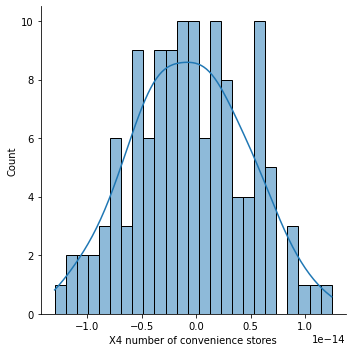

In [36]:
sns.displot(test_residual,bins=25,kde=True)

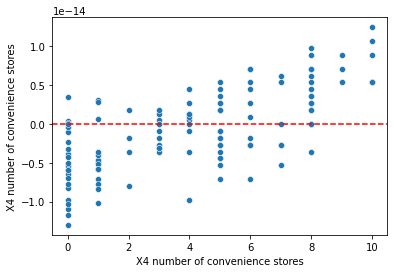

In [37]:
sns.scatterplot(x=y_test,y=test_residual)
plt.axhline(y=0,color='r',ls='--')

In [39]:
model.score(X_test,y_test)

1.0

In [40]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/BasicsPrac/BIKE DETAILS.csv')
df.head()

name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN

In [41]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [43]:
df=df.drop('ex_showroom_price',axis=1)

In [44]:
df.isnull().sum()

name             0
selling_price    0
year             0
seller_type      0
owner            0
km_driven        0
dtype: int64

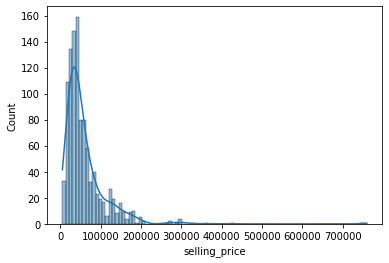

In [45]:
sns.histplot(df['selling_price'],kde=True)

In [46]:
q = df['selling_price'].quantile(0.975)
df_2 = df[df['selling_price']<q]
df_2.describe(include='all')

name  selling_price         year seller_type      owner  \
count               1030    1030.000000  1030.000000        1030       1030   
unique               265            NaN          NaN           2          4   
top     Bajaj Pulsar 150            NaN          NaN  Individual  1st owner   
freq                  41            NaN          NaN        1024        900   
mean                 NaN   53346.678641  2013.761165         NaN        NaN   
std                  NaN   36037.408053     4.295821         NaN        NaN   
min                  NaN    5000.000000  1988.000000         NaN        NaN   
25%                  NaN   27000.000000  2011.000000         NaN        NaN   
50%                  NaN   42000.000000  2015.000000         NaN        NaN   
75%                  NaN   68750.000000  2017.000000         NaN        NaN   
max                  NaN  175000.000000  2020.000000         NaN        NaN   

            km_driven  
count     1030.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean     35181.764078  
std      52159.074675  
min        350.000000  
25%      14500.000000  
50%      25000.000000  
75%      44000.000000  
max     880000.000000

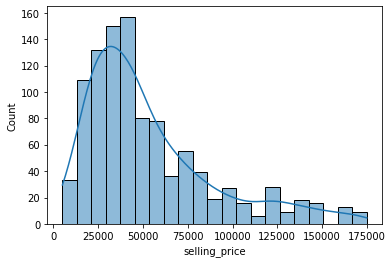

In [47]:
sns.histplot(df_2['selling_price'],kde=True)

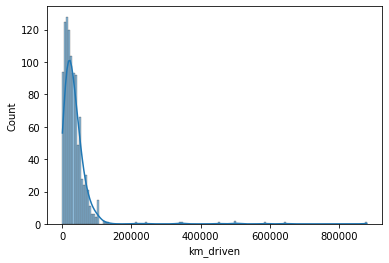

In [48]:
sns.histplot(df_2['km_driven'],kde=True)

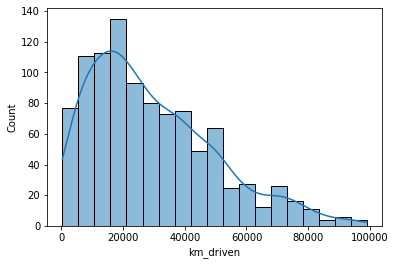

In [50]:
df_3 = df_2[df_2['km_driven']<100000]
sns.histplot(df_3['km_driven'],kde=True)

In [52]:
r = df_3['year'].quantile(0.01)
df_4 = df_3[df_3['year']>r]

In [53]:
df_no_outlier = df_4
df_no_outlier.describe(include='all')

name  selling_price         year seller_type      owner  \
count                986     986.000000   986.000000         986        986   
unique               255            NaN          NaN           2          3   
top     Bajaj Pulsar 150            NaN          NaN  Individual  1st owner   
freq                  40            NaN          NaN         982        869   
mean                 NaN   54242.383367  2014.130832         NaN        NaN   
std                  NaN   35887.881558     3.704863         NaN        NaN   
min                  NaN    6000.000000  2001.000000         NaN        NaN   
25%                  NaN   29925.000000  2012.000000         NaN        NaN   
50%                  NaN   45000.000000  2015.000000         NaN        NaN   
75%                  NaN   70000.000000  2017.000000         NaN        NaN   
max                  NaN  175000.000000  2020.000000         NaN        NaN   

           km_driven  
count     986.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    29451.018256  
std     20398.384830  
min       350.000000  
25%     14000.000000  
50%     25000.000000  
75%     40000.000000  
max     99000.000000

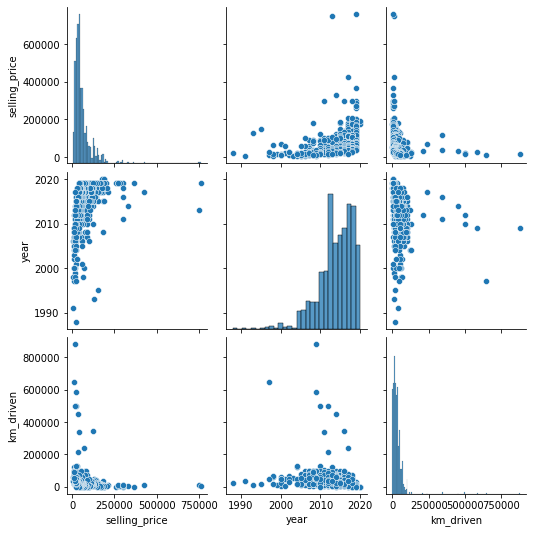

In [54]:
sns.pairplot(df)

In [55]:
df_object = df_no_outlier.select_dtypes(include='object')
df_numeric = df_no_outlier.select_dtypes(exclude='object')

In [56]:
df_object_dummies = pd.get_dummies(df_object,drop_first=True)

In [57]:
df_object_dummies

name_Activa 4g  name_Aprilia SR 125  name_Bajaj  ct 100  \
0                  0                    0                   0   
1                  0                    0                   0   
2                  0                    0                   0   
3                  0                    0                   0   
4                  0                    0                   0   
...              ...                  ...                 ...   
1055               0                    0                   1   
1057               0                    0                   0   
1058               0                    0                   0   
1059               0                    0                   0   
1060               0                    0                   0   

      name_Bajaj Avenger 150  name_Bajaj Avenger 150 street  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   
...                      ...                            ...   
1055                       0                              0   
1057                       0                              0   
1058                       0                              0   
1059                       0                              0   
1060                       0                              0   

      name_Bajaj Avenger 220  name_Bajaj Avenger 220 dtsi  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   
...                      ...                          ...   
1055                       0                            0   
1057                       0                            0   
1058                       0                            0   
1059                       0                            0   
1060                       0                            0   

      name_Bajaj Avenger Cruise 220  name_Bajaj Avenger Street 150 [2018]  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
1055                              0                                     0   
1057                              0                                     0   
1058                              0                                     0   
1059                              0                                     0   
1060                              0                                     0   

      name_Bajaj Avenger Street 160  ...  name_Yamaha Saluto  \
0                                 0  ...                   0   
1                                 0  ...                   0   
2                                 0  ...                   0   
3                                 0  ...                   0   
4                                 0  ...                   0   
...                             ...  ...                 ...   
1055                              0  ...                   0   
1057                              0  ...                   0   
1058                              0  ...                   0   
1059                              0  ...                   0   
1060                              0  ...                   0   

      name_Yamaha Saluto RX  name_Yamaha 

In [59]:
final_df = pd.concat([df_numeric,df_object_dummies],axis=1)

In [60]:
final_df.describe(include='all')

selling_price         year     km_driven  name_Activa 4g  \
count     986.000000   986.000000    986.000000      986.000000   
mean    54242.383367  2014.130832  29451.018256        0.001014   
std     35887.881558     3.704863  20398.384830        0.031846   
min      6000.000000  2001.000000    350.000000        0.000000   
25%     29925.000000  2012.000000  14000.000000        0.000000   
50%     45000.000000  2015.000000  25000.000000        0.000000   
75%     70000.000000  2017.000000  40000.000000        0.000000   
max    175000.000000  2020.000000  99000.000000        1.000000   

       name_Aprilia SR 125  name_Bajaj  ct 100  name_Bajaj Avenger 150  \
count           986.000000          986.000000              986.000000   
mean              0.002028            0.001014                0.001014   
std               0.045015            0.031846                0.031846   
min               0.000000            0.000000                0.000000   
25%               0.000000            0.000000                0.000000   
50%               0.000000            0.000000                0.000000   
75%               0.000000            0.000000                0.000000   
max               1.000000            1.000000                1.000000   

       name_Bajaj Avenger 150 street  name_Bajaj Avenger 220  \
count                     986.000000              986.000000   
mean                        0.001014                0.003043   
std                         0.031846                0.055104   
min                         0.000000                0.000000   
25%                         0.000000                0.000000   
50%                         0.000000                0.000000   
75%                         0.000000                0.000000   
max                         1.000000                1.000000   

       name_Bajaj Avenger 220 dtsi  ...  name_Yamaha Saluto  \
count                   986.000000  ...          986.000000   
mean                      0.002028  ...            0.003043   
std                       0.045015  ...            0.055104   
min                       0.000000  ...            0.000000   
25%                       0.000000  ...            0.000000   
50%                       0.000000  ...            0.000000   
75%                       0.000000  ...            0.000000   
max                       1.000000  ...            1.000000   

       name_Yamaha Saluto RX  name_Yamaha YBR 125  name_Yamaha YZF R15 S  \
count             986.000000           986.000000             986.000000   
mean                0.001014             0.002028               0.006085   
std                 0.031846             0.045015               0.077809   
min                 0.000000             0.000000               0.000000   
25%                 0.000000             0.000000               0.000000   
50%                 0.000000             0.000000               0.000000   
75%                 0.000000             0.000000               0.000000   
max                 1.000000             1.000000               1.000000   

       name_Yamaha YZF R15 V3  name_Yamaha YZF R15 [2011-2018]  name_Yo Style  \
count              986.000000                       986.000000     986.000000   
mean                 0.002028                         0.006085       0.001014   
std                  0.045015                         0.077809       0.031846   
min                  0.000000                         0.000000       0.000000   
25%                  0.000000                         0.000000       0.000000   
50%                  0.000000                         0.000000       0.000000   
75%                  0.000000                         0.000000       0.000000   
max                  1.000000                         1.000000       1.000000   

       seller_type_Individual  owner_2nd owner  owner_3rd owner  
count              986.000000       986.000000       986.000000  
mean                 0.995943         0.1105

In [61]:
final_df.corr()['selling_price'].sort_values()

km_driven                             -0.456714
name_Hero Honda Splendor Plus         -0.120823
name_Honda Activa [2000-2015]         -0.116000
owner_2nd owner                       -0.112209
name_Bajaj Discover 125               -0.096871
                                         ...   
name_Royal Enfield Thunderbird 350     0.189076
name_Royal Enfield Thunderbird 350X    0.235840
name_Royal Enfield Classic 350         0.349870
year                                   0.556753
selling_price                          1.000000
Name: selling_price, Length: 260, dtype: float64

In [62]:
df=final_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 1060
Columns: 260 entries, selling_price to owner_3rd owner
dtypes: int64(3), uint8(257)
memory usage: 278.3 KB


In [63]:
X= df.drop('selling_price',axis=1)

In [64]:
y=df['selling_price']

In [65]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state =42)

In [66]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import ElasticNet
base_elastic_model = ElasticNet()

In [76]:
param_grid={'alpha':[0.1,1,5,10,100],'l1_ratio':[.1,.7,.99,1]}

In [77]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=1)

In [78]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.668e+09, tolerance: 7.765e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.159e+09, tolerance: 8.077e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [79]:
grid_model.best_params_

{'alpha': 5, 'l1_ratio': 0.99}

In [80]:
y_pred = grid_model.predict(scaled_X_test)

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred)

11065.34284441855

In [84]:
np.sqrt(mean_squared_error(y_test,y_pred))

17700.670994484775

In [85]:
11065.34284441855/np.mean(df['selling_price'])

0.20399809443332712